# Linear Algebra Foundations - Interactive Notebook

This notebook contains all the linear algebra implementations from the companion Python script, organized into separate cells for interactive exploration.

## Learning Objectives:
- Understand vector operations and matrix manipulations
- Implement core linear algebra functions from scratch
- Compare manual implementations with NumPy functions
- Explore concepts like determinants, inverses, and matrix spaces


In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter
%matplotlib inline

# Create some initial arrays to explore
a = np.arange(15).reshape(3, 5)
b = np.array([6, 7, 8])

print("Array a:")
print(a)
print(f"Shape: {a.shape}, Type: {type(a)}, Data type: {a.dtype}")

print("\nArray b:")
print(b)
print(f"Shape: {b.shape}, Type: {type(b)}, Data type: {b.dtype}")

Array a:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Shape: (3, 5), Type: <class 'numpy.ndarray'>, Data type: int64

Array b:
[6 7 8]
Shape: (3,), Type: <class 'numpy.ndarray'>, Data type: int64


## 1. Vector Operations

Let's start with basic vector operations: addition, subtraction, and scalar multiplication.


In [7]:
# Create some sample vectors
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# Vector addition
print("Vector addition:")
print(f"v1 + v2 = {v1 + v2}")

# Vector subtraction 
print("\nVector subtraction:")
print(f"v1 - v2 = {v1 - v2}")

# Scalar multiplication
scalar = 2
print("\nScalar multiplication:")
print(f"{scalar} * v1 = {scalar * v1}")


Vector addition:
v1 + v2 = [5 7 9]

Vector subtraction:
v1 - v2 = [-3 -3 -3]

Scalar multiplication:
2 * v1 = [2 4 6]


## 2. Dot Product - Manual vs NumPy Implementation

Compare manual dot product calculation with NumPy's built-in function.


In [8]:
def manual_dot_product(v1, v2):
    """Calculate dot product manually using basic Python operations"""
    if len(v1) != len(v2):
        raise ValueError("Vectors must be of the same length")
    return sum(x * y for x, y in zip(v1, v2))

def vector_dot_product(v1, v2):
    """Calculate dot product using NumPy"""
    return v1 @ v2

# Test both implementations
print("Manual dot product:")
print(manual_dot_product(v1, v2))
print("\nNumPy dot product:")
print(vector_dot_product(v1, v2))
print("\nAlternative NumPy dot product:")
print(np.dot(v1, v2))


Manual dot product:
32

NumPy dot product:
32

Alternative NumPy dot product:
32


## 3. Matrix Transpose

Implement matrix transpose manually and compare with NumPy.


In [9]:
def manual_matrix_transpose(matrix):
    """Calculate matrix transpose manually"""
    return np.array([[row[i] for row in matrix] for i in range(len(matrix[0]))])

def matrix_transpose(matrix):
    """Calculate matrix transpose using NumPy"""
    return matrix.T

# Test with our matrix 'a'
print("Original matrix:")
print(a)
print("\nManual transpose:")
print(manual_matrix_transpose(a))
print("\nNumPy transpose:")
print(matrix_transpose(a))


Original matrix:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Manual transpose:
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]

NumPy transpose:
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


## 4. Determinants - 2x2 and 3x3 Matrices

Calculate determinants manually using the mathematical formulas.


In [10]:
def manual_determinant_2x2(matrix):
    """Calculate 2x2 determinant using formula: ad - bc"""
    if matrix.shape != (2, 2):
        raise ValueError("Matrix must be a 2x2")
    return matrix[0, 0] * matrix[1, 1] - matrix[0, 1] * matrix[1, 0]

def determinant_2x2(matrix):
    """Calculate 2x2 determinant using NumPy"""
    return np.linalg.det(matrix)

def manual_determinant_3x3(matrix):
    """Calculate 3x3 determinant using cofactor expansion"""
    if matrix.shape != (3, 3):
        raise ValueError("Matrix must be a 3x3")
    return (
        matrix[0, 0] * matrix[1, 1] * matrix[2, 2] +
        matrix[0, 1] * matrix[1, 2] * matrix[2, 0] +
        matrix[0, 2] * matrix[1, 0] * matrix[2, 1] -
        matrix[0, 2] * matrix[1, 1] * matrix[2, 0] -
        matrix[0, 1] * matrix[1, 0] * matrix[2, 2] -
        matrix[0, 0] * matrix[1, 2] * matrix[2, 1]
    )

def determinant_3x3(matrix):
    """Calculate 3x3 determinant using NumPy"""
    return np.linalg.det(matrix)

# Test matrices
a2x2 = np.array([[1, 2], [3, 4]])
a3x3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("2x2 matrix:")
print(a2x2)
print("Manual determinant 2x2:", manual_determinant_2x2(a2x2))
print("NumPy determinant 2x2:", determinant_2x2(a2x2))

print("\n3x3 matrix:")
print(a3x3)
print("Manual determinant 3x3:", manual_determinant_3x3(a3x3))
print("NumPy determinant 3x3:", determinant_3x3(a3x3))


2x2 matrix:
[[1 2]
 [3 4]]
Manual determinant 2x2: -2
NumPy determinant 2x2: -2.0000000000000004

3x3 matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Manual determinant 3x3: 0
NumPy determinant 3x3: 0.0


## 5. Matrix Inverses

Calculate matrix inverses and explore singular matrices.


In [11]:
def manual_inverse_2x2(matrix):
    """Calculate 2x2 matrix inverse manually"""
    if matrix.shape != (2, 2):
        raise ValueError("Matrix must be a 2x2")
    determinant = matrix[0, 0] * matrix[1, 1] - matrix[0, 1] * matrix[1, 0]
    if determinant == 0:
        raise ValueError("Matrix is singular, cannot be inverted")
    return np.array([[matrix[1, 1] / determinant, -matrix[0, 1] / determinant], 
                     [-matrix[1, 0] / determinant, matrix[0, 0] / determinant]])

def inverse_2x2(matrix):
    """Calculate 2x2 matrix inverse using NumPy"""
    return np.linalg.inv(matrix)

def inverse_3x3(matrix):
    """Calculate 3x3 matrix inverse using NumPy"""
    return np.linalg.inv(matrix)

print("Manual inverse 2x2:")
print(manual_inverse_2x2(a2x2))
print("\nNumPy inverse 2x2:")
print(inverse_2x2(a2x2))

# Test with a singular (non-invertible) matrix
a_singular = np.array([[1, 2], [2, 4]])
print("\nSingular matrix:")
print(a_singular)
print("Determinant of singular matrix:", determinant_2x2(a_singular))

# This would raise an error:
# print("Inverse of singular matrix:")
# print(inverse_2x2(a_singular))


Manual inverse 2x2:
[[-2.   1. ]
 [ 1.5 -0.5]]

NumPy inverse 2x2:
[[-2.   1. ]
 [ 1.5 -0.5]]

Singular matrix:
[[1 2]
 [2 4]]
Determinant of singular matrix: 0.0


## 6. Column Space and Null Space

Explore the concepts of column space and null space using the singular matrix.


In [12]:
# Column space exploration
print("Column space of singular matrix:")
print("Matrix rank:", np.linalg.matrix_rank(a_singular))

# Find a vector v in the column space of A
# Any vector v that can be written as a linear combination of A's columns is in the column space
A = a_singular  # Using our singular matrix as an example
x = np.array([1, 0])  # Try this vector
v = A @ x  # v will be in the column space by construction
print("\nVector v in column space of A:")
print(f"A = \n{A}")
print(f"x = {x}")
print(f"v = Ax = {v}")
print("v is in column space since it's a linear combination of A's columns")

# Find a vector in the null space of A
# For singular matrix, there exists non-zero x where Ax = 0
# For our singular matrix where second row is 2× first row
# If x = [2, -1], then Ax = 0:
x_null = np.array([2, -1])
result = A @ x_null
print("\nVector x in null space of A:")
print(f"x = {x_null}")
print(f"Ax = {result}")
print("x is in null space since Ax = 0")

# Verify this is indeed in null space
is_zero = np.allclose(result, np.zeros_like(result))
print(f"Is Ax zero? {is_zero}")


Column space of singular matrix:
Matrix rank: 1

Vector v in column space of A:
A = 
[[1 2]
 [2 4]]
x = [1 0]
v = Ax = [1 2]
v is in column space since it's a linear combination of A's columns

Vector x in null space of A:
x = [ 2 -1]
Ax = [0 0]
x is in null space since Ax = 0
Is Ax zero? True


## 7. Visualization with Matplotlib

Create a simple plot to demonstrate matplotlib integration.


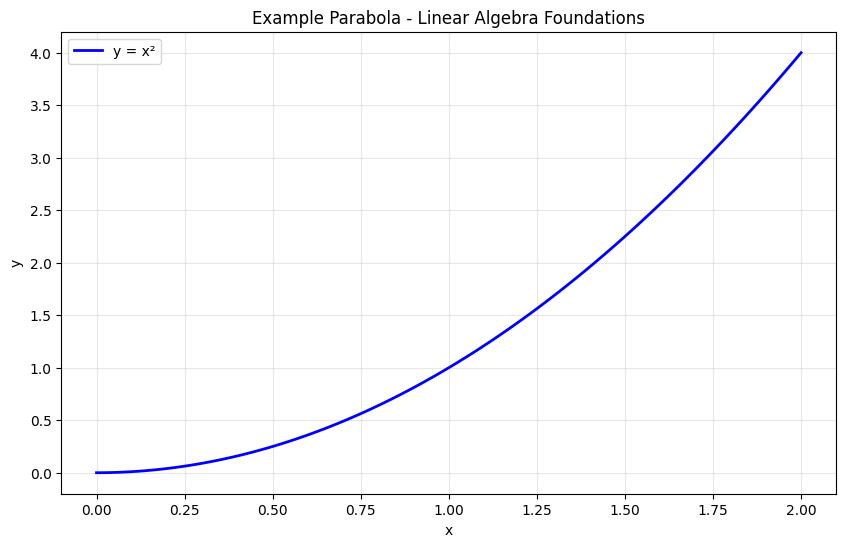

Plot completed! This demonstrates matplotlib integration with our linear algebra work.


In [13]:
# Create a simple parabola plot
x = np.linspace(0, 2, 100)
y = x ** 2

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='y = x²')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example Parabola - Linear Algebra Foundations')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("Plot completed! This demonstrates matplotlib integration with our linear algebra work.")


## 8. Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are fundamental concepts in linear algebra with applications throughout ML/AI.

**Key Concepts:**
- An eigenvector of a matrix A is a non-zero vector v such that Av = λv for some scalar λ
- λ (lambda) is called the eigenvalue corresponding to eigenvector v
- Geometrically: eigenvectors are directions that don't change when the transformation A is applied
- Only the magnitude changes, by a factor of the eigenvalue

**Applications in ML:**
- Principal Component Analysis (PCA) for dimensionality reduction
- Stability analysis of neural networks
- PageRank algorithm
- Spectral clustering


In [14]:
# Let's start with a simple diagonal matrix
# For diagonal matrices, eigenvalues are the diagonal elements
# and eigenvectors are the standard basis vectors

diagonal_matrix = np.array([[2, 0], [0, 3]])
print("Diagonal matrix:")
print(diagonal_matrix)

# Calculate eigenvalues and eigenvectors using NumPy
eigenvalues, eigenvectors = np.linalg.eig(diagonal_matrix)

print(f"\nEigenvalues: {eigenvalues}")
print(f"Eigenvectors:\n{eigenvectors}")

# Let's verify the fundamental equation: Av = λv
print("\nVerification (Av = λv):")
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]  # i-th eigenvector (column)
    lam = eigenvalues[i]    # i-th eigenvalue
    
    Av = diagonal_matrix @ v
    lambda_v = lam * v
    
    print(f"\nEigenvector {i+1}: {v}")
    print(f"A @ v = {Av}")
    print(f"λ * v = {lambda_v}")
    print(f"Are they equal? {np.allclose(Av, lambda_v)}")


Diagonal matrix:
[[2 0]
 [0 3]]

Eigenvalues: [2. 3.]
Eigenvectors:
[[1. 0.]
 [0. 1.]]

Verification (Av = λv):

Eigenvector 1: [1. 0.]
A @ v = [2. 0.]
λ * v = [2. 0.]
Are they equal? True

Eigenvector 2: [0. 1.]
A @ v = [0. 3.]
λ * v = [0. 3.]
Are they equal? True


In [ ]:
# Now let's try a more interesting case: a shear matrix
# Shear transformations are more complex and have interesting eigenproperties

shear_matrix = np.array([[1, 1], [0, 1]])
print("Shear matrix:")
print(shear_matrix)

# Calculate eigenvalues and eigenvectors
eigenvalues_shear, eigenvectors_shear = np.linalg.eig(shear_matrix)

print(f"\nEigenvalues: {eigenvalues_shear}")
print(f"Eigenvectors:\n{eigenvectors_shear}")

# Verify the fundamental equation
print("\nVerification for shear matrix:")
for i in range(len(eigenvalues_shear)):
    v = eigenvectors_shear[:, i]
    lam = eigenvalues_shear[i]
    
    Av = shear_matrix @ v
    lambda_v = lam * v
    
    print(f"\nEigenvector {i+1}: {v}")
    print(f"A @ v = {Av}")
    print(f"λ * v = {lambda_v}")
    print(f"Are they equal? {np.allclose(Av, lambda_v)}")

# Note: Shear matrices have repeated eigenvalues but may not be diagonalizable
print(f"\nNote: This shear matrix has repeated eigenvalue λ = {eigenvalues_shear[0]}")
print("This represents a case where the transformation stretches along one direction only.")


In [ ]:
# Let's explore a symmetric matrix, which has nice eigenvalue properties
# Symmetric matrices always have real eigenvalues and orthogonal eigenvectors

symmetric_matrix = np.array([[4, 2], [2, 1]])
print("Symmetric matrix:")
print(symmetric_matrix)

eigenvalues_sym, eigenvectors_sym = np.linalg.eig(symmetric_matrix)

print(f"\nEigenvalues: {eigenvalues_sym}")
print(f"Eigenvectors:\n{eigenvectors_sym}")

# Check if eigenvectors are orthogonal (dot product should be ~0)
v1, v2 = eigenvectors_sym[:, 0], eigenvectors_sym[:, 1]
dot_product = np.dot(v1, v2)
print(f"\nDot product of eigenvectors: {dot_product}")
print(f"Are eigenvectors orthogonal? {np.allclose(dot_product, 0)}")

# Verify the eigenvalue equation for both eigenvectors
print("\nVerification:")
for i in range(len(eigenvalues_sym)):
    v = eigenvectors_sym[:, i]
    lam = eigenvalues_sym[i]
    
    Av = symmetric_matrix @ v
    lambda_v = lam * v
    
    print(f"\nEigenvector {i+1}: {v}")
    print(f"Eigenvalue {i+1}: {lam}")
    print(f"A @ v = {Av}")
    print(f"λ * v = {lambda_v}")
    print(f"Verification: {np.allclose(Av, lambda_v)}")


In [ ]:
# Geometric interpretation: Visualizing eigenvectors
# Let's create a visualization to understand what eigenvectors represent

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original vectors to transform
original_vectors = np.array([[1, 0], [0, 1], [1, 1], [1, -1]]).T

# Transform with our symmetric matrix
transformed_vectors = symmetric_matrix @ original_vectors

# Plot 1: Show original and transformed vectors
ax1.quiver([0, 0, 0, 0], [0, 0, 0, 0], 
           original_vectors[0], original_vectors[1], 
           angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.7, 
           label='Original vectors', width=0.005)

ax1.quiver([0, 0, 0, 0], [0, 0, 0, 0], 
           transformed_vectors[0], transformed_vectors[1], 
           angles='xy', scale_units='xy', scale=1, color='red', alpha=0.7,
           label='Transformed vectors', width=0.005)

# Add eigenvectors (scaled for visibility)
scale_factor = 2
for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues_sym, eigenvectors_sym.T)):
    ax1.quiver(0, 0, scale_factor * eigenvec[0], scale_factor * eigenvec[1], 
               angles='xy', scale_units='xy', scale=1, 
               color='green', width=0.008,
               label=f'Eigenvector {i+1} (λ={eigenval:.2f})' if i < 2 else "")

ax1.set_xlim(-3, 6)
ax1.set_ylim(-3, 4)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax1.legend()
ax1.set_title('Vector Transformation and Eigenvectors')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot 2: Show how eigenvectors behave under transformation
ax2.quiver([0, 0], [0, 0], 
           eigenvectors_sym[0], eigenvectors_sym[1], 
           angles='xy', scale_units='xy', scale=1, color='green', 
           label='Original eigenvectors', width=0.008)

# Transform eigenvectors
transformed_eigenvectors = symmetric_matrix @ eigenvectors_sym
ax2.quiver([0, 0], [0, 0], 
           transformed_eigenvectors[0], transformed_eigenvectors[1], 
           angles='xy', scale_units='xy', scale=1, color='orange', 
           label='Transformed eigenvectors', width=0.008)

ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')
ax2.legend()
ax2.set_title('Eigenvectors: Direction Preserved')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

print("Key Observations:")
print("1. Eigenvectors maintain their direction after transformation")
print("2. Only their magnitude changes by the eigenvalue factor")
print("3. Other vectors change both direction and magnitude")
print("4. Eigenvectors represent the 'natural' directions of the transformation")


## Convex Combinations
Learn about convex combinations by implementing an interesting example of morphing.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the two images
I = plt.imread('young.png')
J = plt.imread('aged.png')

# Selecting number of intermediate combinations and creating subplots
n = 15
fig, ax = plt.subplots(1, n, figsize=(50, 25))

# Generating convex combinations and plotting them
for i, alpha in zip(np.arange(n), np.linspace(0, 1, n)):
    im = (1-alpha)*I + alpha*J
    print(im)
    ax[i].imshow(im, cmap='bone');ax[i].axis('off')
    ax[i].set_title(str(np.round(alpha, 2)))

## Linear System Solver
Design a Python algorithm to solve a system of linear equations.

In [17]:
import numpy as np

def findInstersectionIfExists(e1: np.array, e2: np.array) -> str:
    alpha = e1[0]/e2[0]
    e2 = e2*alpha
    if (e2==e1).all():
        return "There are infinitely many solutions"
    elif (e2[:2] == e1[:2]).all():
        return "Intersection does not exist"
    else:
        e2 = e2 - e1
        w2 = e2[2]/e2[1]
        w1 = (e1[2]-(e1[1]*w2))/e1[0]
        return '%.3f , %.3f' %(w1,w2)

# Verify solution
#e1 = np.array([2, 4, 9])
#e1 = np.array([2, 2, 4])
e1 = np.array([2, 4, 9])
#e2 = np.array([3, 7, 3])
#e2 = np.array([4, 4, 8])
e2 = np.array([2, 4, 3])
print(findInstersectionIfExists(e1,e2))

Intersection does not exist
